In [534]:
dut.disconnect()

Serial port disconnected.


In [145]:
dut.ground_PIC()

DAC initialized to a span from -5 V to 5 V


In [241]:
dut.reset_chip()
dut.reset_dpe()

In [242]:
dut.power_off()

In [525]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)


In [486]:
dut.power_on()

Calibrate all 12 ADCs on A0

In [487]:
volt_in = np.arange(0.5, 4.5, 0.1)
volt_out_list = []
for addr_fifo in range(12):
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out_list.append( [dut.adc2volt(d) for d in data] )
    

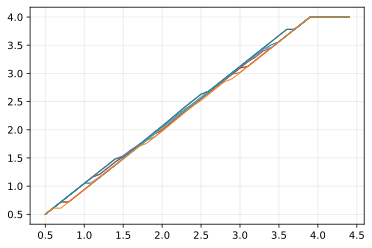

In [488]:
plt.grid(True, alpha=0.3)
for volt_out in volt_out_list:
    plt.plot(volt_in, volt_out, linewidth=1)

In [530]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

dut.load_vectors_rows_to_zero()
dut.load_vectors_cols_to_zero()


drv.gpio_array_en_write(0b100)
drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
drv.gpio_row_col_bank_write(0b0010)
drv.gpio_row_col_data_write(0b0001_0000_0000_0000)
time.sleep(1e-5)
drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
time.sleep(1e-5)
drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

# data = dut.data_generate_sparse([0, 6])
# dut.load_vectors(array=2, data=data)

dut.reset_dpe()
# dut.py_logic_analyzer()

In [531]:
dut.reset_dpe()

drv.gpio_pin_set(*PIC_PINS['WRITE_SEL_EXT'])
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])                 
time.sleep(5e-6)   
drv.gpio_nforce_safe_write(0b111)
time.sleep(5e-6)        # delay(t_cal_start), min = 2TCK
drv.gpio_pin_set(*PIC_PINS['COL_WRITE_CONNECT'])
time.sleep(5e-6)        # delay(t_opamp), min = 500ns
drv.gpio_pin_set(*PIC_PINS['CONNECT_TIA'])
#drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [532]:
# Before setting this, we're using an external current source to apply to the board!
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [522]:
n_adc = 0

data = dut.download_fifo( n_adc )

for d in data:
    print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    
# drv.gpio_adc_fifo_en_write(n_adc)

# for strobe in range(15):
#     drv.gpio_pin_set(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     drv.gpio_pin_reset(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     data = drv.gpio_adc_read()
#     print(f'{data:013b}', end='\t')
#     #print(strobe)
#     print( f'{dut.adc2volt(data):.3f} V' )
# print()

0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000100000 -> 0.609
0101101011111 -> 3.453
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500


In [533]:
for n_adc in range(12):
    data = dut.download_fifo( n_adc )

    print(f'fifo #{n_adc}')
    for d in data:
        print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    print()

fifo #0
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000100000 -> 0.609
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

fifo #1
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

fifo #2
0100001000000 -> 0.719
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
01000000

---------NEW CALIBRATION WITH ZHAN'S MAPPING=---------

In [195]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

dut.load_vectors_rows_to_zero()
dut.load_vectors_cols_to_zero()



In [ ]:
drv.gpio_array_en_write(0b010)
drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
drv.gpio_row_col_bank_write(0b0001)
drv.gpio_row_col_data_write(0b1000_0000_0000_0000)
time.sleep(1e-5)
drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
time.sleep(1e-5)
drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

dut.reset_dpe()

In [162]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

data = dut.data_generate_sparse([59, 5, 59, 7])
dut.load_vectors(array=2, data=data)

1
0
2
12288
4
0
8
0


In [143]:
dut.py_logic_analyzer()

1 	PWR_GOOD
1 	NRESET_FULL_CHIP
1 	NRESET_DPE_ENGINE
0 	ARRAY_EN<0>
0 	ARRAY_EN<1>
0 	ARRAY_EN<2>
0 	NFORCE_SAFE0
0 	NFORCE_SAFE1
0 	NFORCE_SAFE2
0 	ADC_SEL_EXT
0 	DPE_EXT_OVERRIDE_EN
0 	DPE_EXT_SH
1 	ADC_DONE
0 	ADC_FIFO_ADVANCE
0 	ADC_FIFO_EN<0>
0 	ADC_FIFO_EN<1>
0 	ADC_FIFO_EN<2>
0 	ADC_FIFO_EN<3>


Read test

In [493]:
def _read(Vread, Vgate, array=0, row=0, col=0):
    dut.scan_control(scan_ctrl_bits=bytes([0x10, 0x02, 0x0c, 0x10,
                                           0x20, 0x01, 0x02]))
#     dut.scan_tia( BitArray('0b1111100010'*96).bytes )
#     dut.scan_tia( BitArray('0b1101000100'*96).bytes )
    dut.scan_tia( BitArray('0b1100001000'*96).bytes )
    dut.dac_set('PLANE_VPP', Vread)
    dut.dac_set('P_VREF_TIA', 0.5)
    dut.dac_set('P_TVDD', Vgate)

    data_load = dut.data_generate_sparse([row, col])
    dut.load_vectors(array=array, data=data_load)

    ################LOAD VECTOR REPLACEMENT############
#     drv.gpio_array_en_write(0b100)
#     drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
#     drv.gpio_row_col_bank_write(0b0001)
#     drv.gpio_row_col_data_write(0b1000_0000_0000_0000)
#     time.sleep(1e-5)
#     drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
#     time.sleep(1e-5)
#     drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

#     drv.gpio_array_en_write(0b100)
#     drv.gpio_pin_reset(*PIC_PINS['COL_ROW_SEL'])
#     drv.gpio_row_col_bank_write(0b0001)
#     drv.gpio_row_col_data_write(0b0100_0000_0000_0000)
#     time.sleep(1e-5)
#     drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
#     time.sleep(1e-5)
#     drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])
    ################END LOAD VECTOR REPLACEMENT########

    dut.pads_defaults()

    dut.reset_dpe()

    # drv.gpio_pin_set(*PIC_PINS['DPE_INTERNAL_EN'])

    drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])
    drv.gpio_pin_set(*PIC_PINS['READ_BIT'])
    drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])

    drv.gpio_nforce_safe_write(0b100)
    drv.gpio_pin_set(*PIC_PINS['CONNECT_TIA'])
    drv.gpio_pin_set(*PIC_PINS['CONNECT_COLUMN_T'])

    # drv.gpio_pin_set(*PIC_PINS['DPE_PULSE'])
    # drv.gpio_pin_reset(*PIC_PINS['DPE_PULSE'])

    drv.gpio_pin_set(*PIC_PINS['DPE_EXT_PULSE'])
    time.sleep(0.01)
    drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])
    
    [fifo_en, channel] = dut.which_fifo([array, row, col])

    data = dut.download_fifo( fifo_en )
    volt = dut.adc2volt(data[channel])
    
    return volt
    

In [498]:
Vreads = np.arange(0.46,0.51,0.001)
Vgates = np.arange(4.5,5,0.5)

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( _read(vread, Vgate, array=2, row=29, col=0 ) )
    volts_set.append(volts)

4.50-

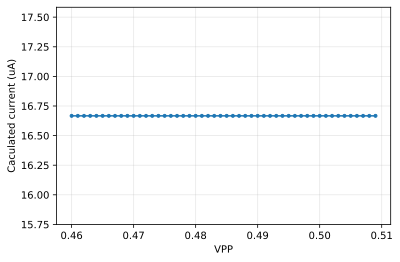

In [499]:
for volts in volts_set:
    plt.plot(Vreads, [v/30e3 * 1e6 for v in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)

In [379]:
[fifo_en, channel] = dut.which_fifo([2, 31, 0])
print(fifo_en, channel)

0 7


In [ ]:
for n_adc in [0,1,6,7]:

    data = dut.download_fifo( n_adc )

    print(f'fifo #{n_adc}')
    for d in data:
        print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    print()

In [ ]:
for n_adc in [0,1,6,7]:

    data = dut.download_fifo( n_adc )

    print(f'fifo #{n_adc}')
    for d in data:
        print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    print()

In [45]:
# for n_adc in range(12):
n_adc = 0

data = dut.download_fifo( n_adc )

print(f'fifo #{n_adc}')
for d in data:
    print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
print()

n_adc = 11

data = dut.download_fifo( n_adc )

print(f'fifo #{n_adc}')
for d in data:
    print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
print()

fifo #0
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110101001000 -> 1.622
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110001001000 -> 0.746
0110010100000 -> 1.047
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500

fifo #11
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110010000000 -> 0.938
0110100000000 -> 1.376
0110000100000 -> 0.609
0110000000000 -> 0.500
0110010000000 -> 0.938
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000100000 -> 0.609
0110011000000 -> 1.157
0110000000000 -> 0.500
0110000000000 -> 0.500



In [477]:
Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
Vgates = [5,]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single(vread, Vgate, array=2, row=30, col=0, gain=2) )
    volts_set.append(volts)

5.00-

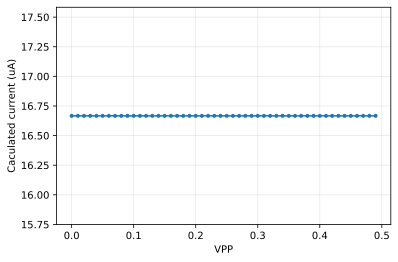

In [478]:
for volts in volts_set:
    plt.plot(Vreads, [v/30e3 * 1e6 for v in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)

In [ ]:
Vread1 = 0.1
Vread2 = 0.2

Vgate = 5

Gmap = []

for r in range(64):
    print(f'r={r}, ')
    Grow = []
    for c in range(64):
#         print(f'{c}', end=',')
        v1 = a0.read_single(Vread=Vread1, Vgate=Vgate, array=2, row=r, col=c, gain=2)
        v2 = a0.read_single(Vread=Vread2, Vgate=Vgate, array=2, row=r, col=c, gain=2)
        Grow.append( (v2-v1)/5e3 / 0.1 )
    Gmap.append(Grow)
#     print()


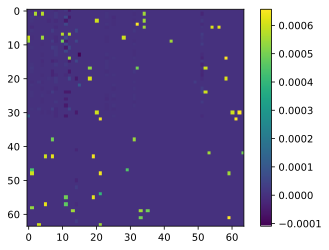

In [428]:
plt.imshow(Gmap)
plt.colorbar()

In [429]:
from lib_data import *

save_workspace(vars())

Saving In(<class 'list'>), Out(<class 'dict'>), PIC_PINS(<class 'dict'>), DAC_CH(<class 'dict'>), DAC_SPAN(<class 'dict'>), REFCLKO(<class 'dict'>), addr_fifo(<class 'int'>), volt_in(<class 'numpy.ndarray'>), data(<class 'list'>), volt_out(<class 'list'>), Vread(<class 'float'>), Vgate(<class 'int'>), n_adc(<class 'int'>), d(<class 'int'>), volt(<class 'float'>), volts(<class 'list'>), vread(<class 'numpy.float64'>), Vreads(<class 'numpy.ndarray'>), Vgates(<class 'numpy.ndarray'>), volts_set(<class 'list'>), volt_out_list(<class 'list'>), data_load(<class 'list'>), fifo_en(<class 'int'>), channel(<class 'int'>), Vread1(<class 'float'>), Vread2(<class 'float'>), Gmap(<class 'list'>), r(<class 'int'>), Grow(<class 'list'>), c(<class 'int'>), v1(<class 'float'>), v2(<class 'float'>), to 20190801-162212-.pkl
Saving In(<class 'list'>), addr_fifo(<class 'int'>), volt_in(<class 'numpy.ndarray'>), data(<class 'list'>), volt_out(<class 'list'>), Vread(<class 'float'>), Vgate(<class 'int'>), n_a